# Prueba
Es una libreria que construye encima de Matplotlib, la cual permite mejores estilos y se adapta correctamente a las librerias de Pandas

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
T0 = 24 # celcius

# convetirlo a kelvin
T0 = T0 + 273.15

R0 = 1.4 # +- 1 Omhs
T0

297.15

In [21]:
aop = (5-1)/(1100 - 300)
aop

# para el material tungsteno
a0 = 14/2800
a0

# dan iguales

0.005

In [25]:
volts = [2.0 + 0.5 * i for i in range(13)] #v
amperes = [4.0, 4.5, 4.9, 5.3, 5.7, 5.8, 6.3, 6.6, 6.9, 7.1, 7.4, 7.7, 8.0] #amperes
radiacion = [.6, .8, 1.2, 1.7, 2.5, 3.2, 3.9, 5.9, 7.0, 7.8, 9.4, 11.0, 12.5] #mv

In [27]:
# corregir el .0 del ampere que saque
df = pd.DataFrame({'volts': volts, 'amperes': amperes, 'radiacion': radiacion})
df['amperes'] = df['amperes']/10
df

,volts,amperes,radiacion
0,2.0,0.40,0.6
1,2.5,0.45,0.8
2,3.0,0.49,1.2
3,3.5,0.53,1.7
4,4.0,0.57,2.5
5,4.5,0.58,3.2
6,5.0,0.63,3.9
7,5.5,0.66,5.9
8,6.0,0.69,7.0
9,6.5,0.71,7.8


In [38]:
# V = IR
# R = V/I
df['R/R0'] = df.volts / (df.amperes * ResInit)
df.head() #para ver los primeros datos

,volts,amperes,radiacion,R/R0,T
0,2.0,0.40,0.6,3.571429,811.435714
1,2.5,0.45,0.8,3.968254,890.800794
2,3.0,0.49,1.2,4.373178,971.785569
3,3.5,0.53,1.7,4.716981,1040.546226
4,4.0,0.57,2.5,5.012531,1099.656266


In [29]:
df['T'] = T0 + ( df['R/R0'] - 1 )/a0

In [73]:
df.to_csv('boltzman.csv')

Text(0, 0.5, 'Radiacion [mV]')

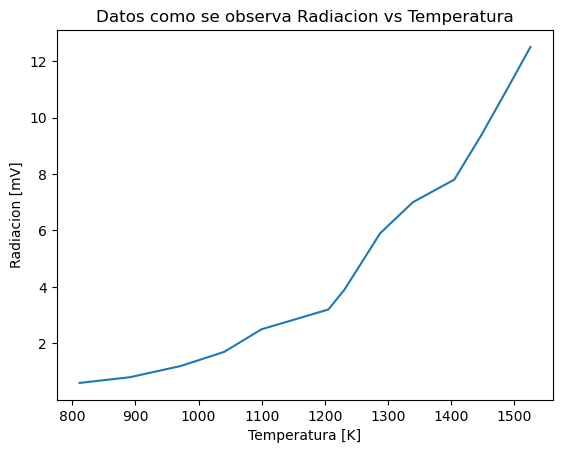

In [37]:
plt.plot(df['T'], df['radiacion'])
plt.title('Datos como se observa Radiacion vs Temperatura')
plt.xlabel('Temperatura [K]')
plt.ylabel('Radiacion [mV]')

In [44]:
# entonces para ver con que poder aumenta, se calcula el poder 4
df['T4'] = df['T']**4
df.head()

,volts,amperes,radiacion,R/R0,T,T4
0,2.0,0.40,0.6,3.571429,811.435714,4.335273e+11
1,2.5,0.45,0.8,3.968254,890.800794,6.296836e+11
2,3.0,0.49,1.2,4.373178,971.785569,8.918294e+11
3,3.5,0.53,1.7,4.716981,1040.546226,1.172318e+12
4,4.0,0.57,2.5,5.012531,1099.656266,1.462271e+12


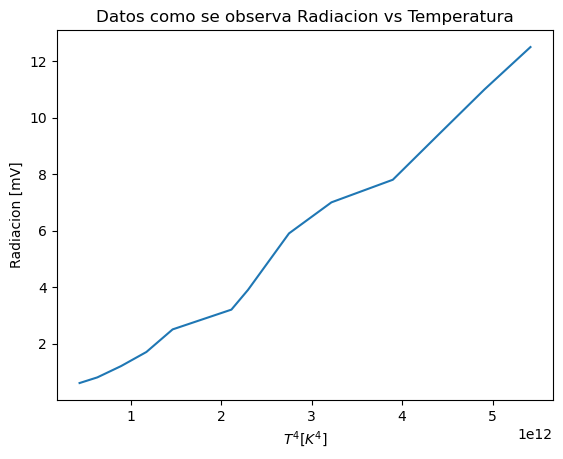

In [47]:
plt.plot(df['T4'], df['radiacion'])
plt.title('Datos como se observa Radiacion vs Temperatura')
plt.xlabel(r'$T^4 [K^4]$')
plt.ylabel('Radiacion [mV]')
plt.show()

Lo cual se ve como una linea.

entonces el radio entre
$$
\frac{P}{T^4} = \sigma
$$
se identificaria asi como un modelo lineal si este valor no varia mucho y aparte estaria calculando la constante de boltzmannn

In [59]:

df['boltz'] = df['radiacion'] / df['T4']
df.head()

,volts,amperes,radiacion,R/R0,T,T4,boltz
0,2.0,0.40,0.6,3.571429,811.435714,4.335273e+11,1.383996e-12
1,2.5,0.45,0.8,3.968254,890.800794,6.296836e+11,1.270479e-12
2,3.0,0.49,1.2,4.373178,971.785569,8.918294e+11,1.345549e-12
3,3.5,0.53,1.7,4.716981,1040.546226,1.172318e+12,1.450118e-12
4,4.0,0.57,2.5,5.012531,1099.656266,1.462271e+12,1.709670e-12


In [64]:
# ya que mido en mV = 10^-3 -> [V / T^4]
# y para pasar de Volts a W se multiplica por 22
df['boltzConst'] = df['boltz'] * 22 * 10**3

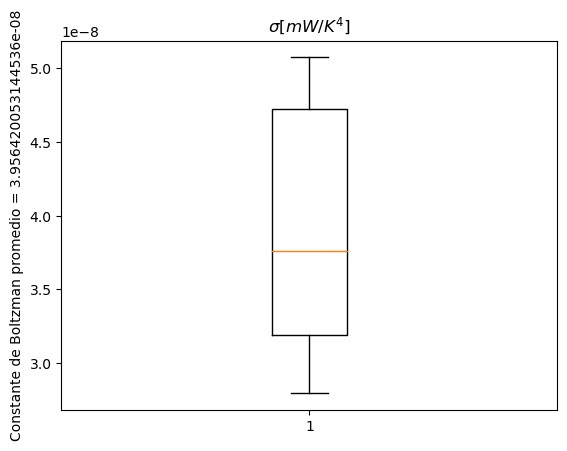

In [72]:
plt.boxplot(df.boltzConst)
plt.ylabel(f'Constante de Boltzman promedio = {np.mean(df.boltzConst)}')
plt.title(r'$\sigma [mW/K^4]$')
plt.show()

In [74]:
df.to_csv('boltzman_analizado.csv')